# Coronavirus 2019 Data Analysis (Global) -Version 2

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rc, rcParams
import commonFunction as cf 

# Read Data
* Fetching data from https://github.com/CSSEGISandData/COVID-19
* Credit: Johns Hopkins CSSE

In [2]:
# update the data
import shutil
import os
if os.path.isfile('COVID-19'):
    shutil.rmtree('COVID-19')
!git clone https://github.com/CSSEGISandData/COVID-19

fatal: destination path 'COVID-19' already exists and is not an empty directory.


In [3]:
base_path = 'COVID-19/csse_covid_19_data/csse_covid_19_time_series/'
df_confirmed = cf.readData(base_path, 'time_series_19-covid-Confirmed.csv','Confirmed')
df_confirmed.head()

,Country/Region,Province/State,Date,Confirmed
0,Mainland China,Anhui,2020-01-22,1.0
1,Mainland China,Beijing,2020-01-22,14.0
2,Mainland China,Chongqing,2020-01-22,6.0
3,Mainland China,Fujian,2020-01-22,1.0
4,Mainland China,Gansu,2020-01-22,0.0


In [4]:
df_deaths = cf.readData(base_path, 'time_series_19-covid-Deaths.csv','Deaths')
df_deaths.head()

,Country/Region,Province/State,Date,Deaths
0,Mainland China,Anhui,2020-01-22,0.0
1,Mainland China,Beijing,2020-01-22,0.0
2,Mainland China,Chongqing,2020-01-22,0.0
3,Mainland China,Fujian,2020-01-22,0.0
4,Mainland China,Gansu,2020-01-22,0.0


In [5]:
df_recovered = cf.readData(base_path, 'time_series_19-covid-Recovered.csv','Recovered')
df_recovered.head()

,Country/Region,Province/State,Date,Recovered
0,Mainland China,Anhui,2020-01-22,0.0
1,Mainland China,Beijing,2020-01-22,0.0
2,Mainland China,Chongqing,2020-01-22,0.0
3,Mainland China,Fujian,2020-01-22,0.0
4,Mainland China,Gansu,2020-01-22,0.0


In [6]:
# combine data
df = df_confirmed.append(df_deaths)
df = df.append(df_recovered)
df = df[['Date', 'Province/State', 'Country/Region', 'Confirmed','Deaths','Recovered']]
df[['Confirmed','Deaths','Recovered']] = df[['Confirmed','Deaths','Recovered']].fillna(0)
df

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


,Date,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...,...
6918,2020-03-04,NaN,Gibraltar,0.0,0.0,0.0
6919,2020-03-04,NaN,Liechtenstein,0.0,0.0,0.0
6920,2020-03-04,NaN,Poland,0.0,0.0,0.0
6921,2020-03-04,NaN,Tunisia,0.0,0.0,0.0


In [7]:
#listing all the countries where the virus has spread
country_list=list(df['Country/Region'].unique())
print(country_list)

['Mainland China', 'Thailand', 'Japan', 'South Korea', 'Taiwan', 'US', 'Macau', 'Hong Kong', 'Singapore', 'Vietnam', 'France', 'Nepal', 'Malaysia', 'Canada', 'Australia', 'Cambodia', 'Sri Lanka', 'Germany', 'Finland', 'United Arab Emirates', 'Philippines', 'India', 'Italy', 'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt', 'Iran', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan', 'Bahrain', 'Kuwait', 'Algeria', 'Croatia', 'Switzerland', 'Austria', 'Israel', 'Pakistan', 'Brazil', 'Georgia', 'Greece', 'North Macedonia', 'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands', 'San Marino', 'Belarus', 'Iceland', 'Lithuania', 'Mexico', 'New Zealand', 'Nigeria', 'Ireland', 'Luxembourg', 'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic', 'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal', 'Andorra', 'Latvia', 'Morocco', 'Saudi Arabia', 'Senegal', 'Argentina', 'Chile', 'Jordan', 'Ukraine', 'Saint Barthelemy', 'Hungary', 'Faroe Islands', 'Gibraltar', 'Liechtenstein', '

# Data preprocessing

In [8]:
df_stat = df.groupby(['Date']).sum().reset_index(drop=None)
df_stat['Daily_confirmed_cases']=df_stat.Confirmed.diff()
df_stat['Daily_deaths']=df_stat.Deaths.diff()
df_stat['Daily_recoveries']=df_stat.Recovered.diff()
df_stat['death_rate']=df_stat.apply(lambda x: x['Deaths']*100/(x['Confirmed']), axis=1)
df_stat.head()

,Date,Confirmed,Deaths,Recovered,Daily_confirmed_cases,Daily_deaths,Daily_recoveries,death_rate
0,2020-01-22,555.0,17.0,28.0,NaN,NaN,NaN,3.063063
1,2020-01-23,653.0,18.0,30.0,98.0,1.0,2.0,2.756508
2,2020-01-24,941.0,26.0,36.0,288.0,8.0,6.0,2.763018
3,2020-01-25,1434.0,42.0,39.0,493.0,16.0,3.0,2.928870
4,2020-01-26,2118.0,56.0,52.0,684.0,14.0,13.0,2.644004


# Plot graphs

/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Dates')

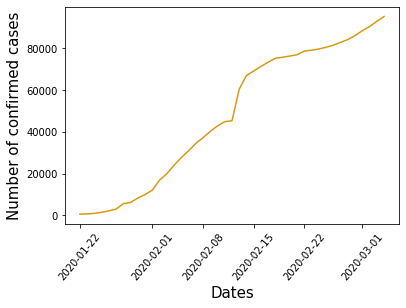

In [9]:
#plotting confirmed cases over time
plt.plot('Date', 'Confirmed', data=df_stat, color='#D79913')
plt.xticks(rotation=50)
plt.ylabel('Number of confirmed cases',fontsize=15)
plt.xlabel('Dates',fontsize=15)

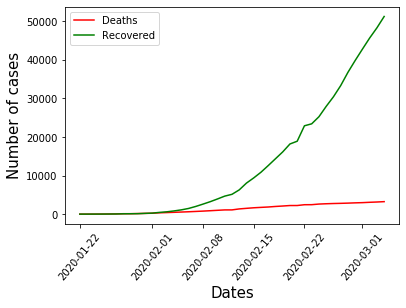

In [10]:
#plotting two line plots for deaths and recoveries respectively
plt.plot('Date', 'Deaths', data=df_stat, color='red')
plt.plot('Date', 'Recovered', data=df_stat, color='green')
plt.xticks(rotation=50)
plt.ylabel('Number of cases',fontsize=15)
plt.xlabel('Dates',fontsize=15)
plt.legend()
plt.show()

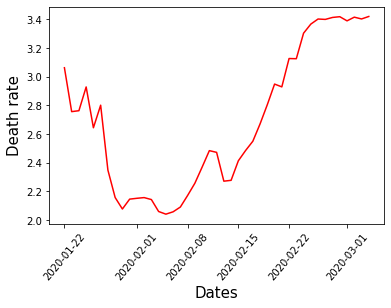

In [11]:
plt.plot('Date','death_rate',data=df_stat, color='red')
plt.xticks(rotation=50)
plt.ylabel('Death rate',fontsize=15)
plt.xlabel('Dates',fontsize=15)
plt.show()

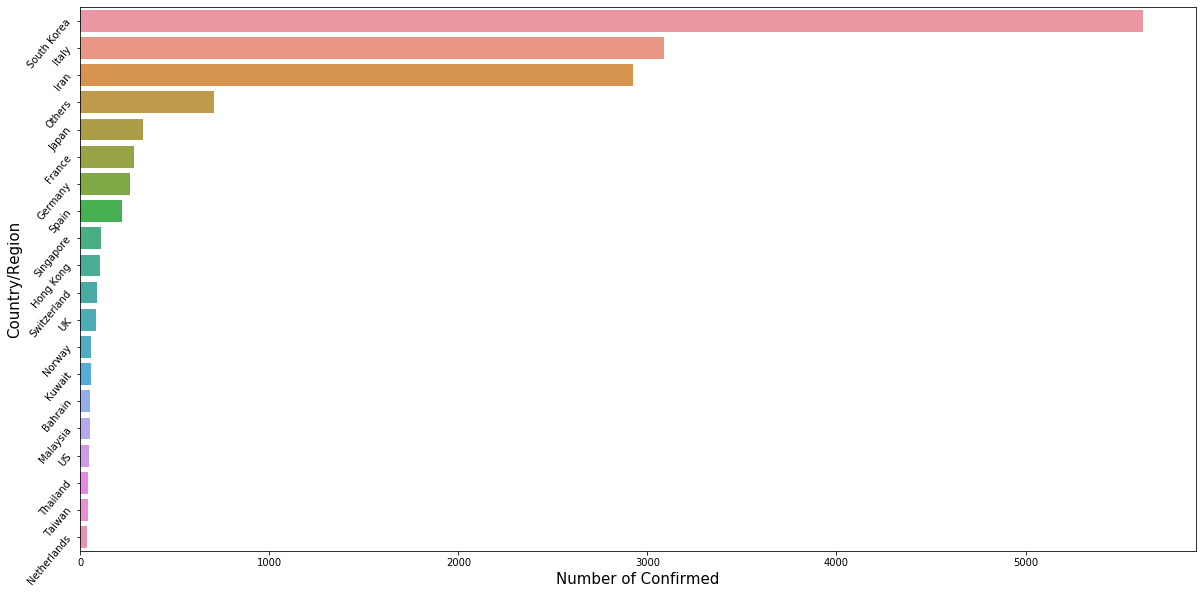

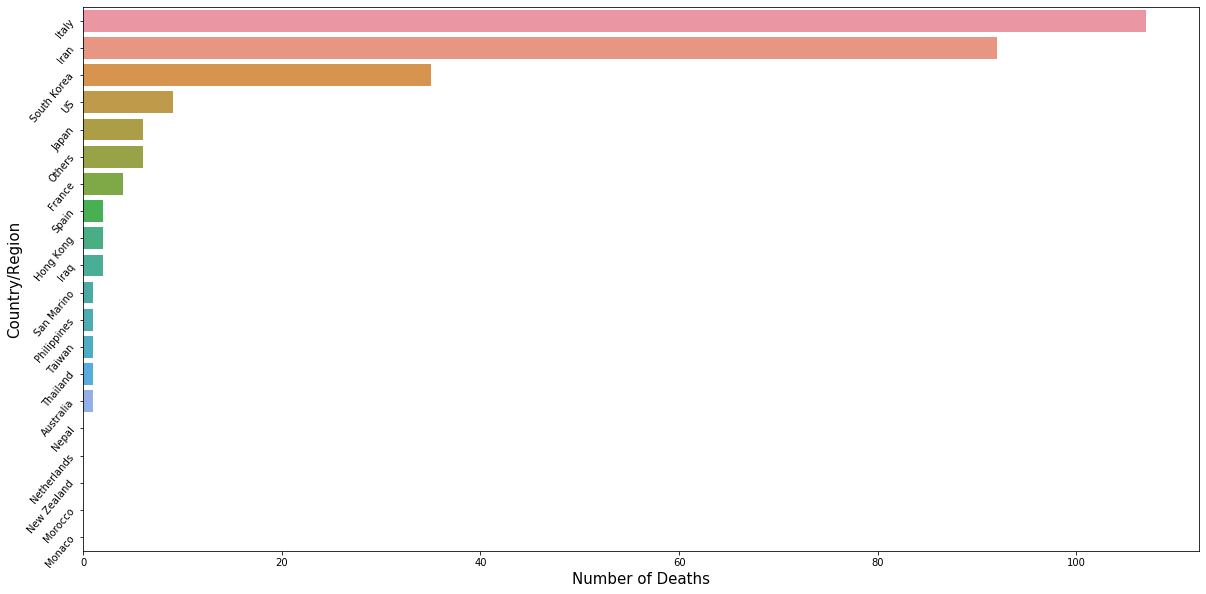

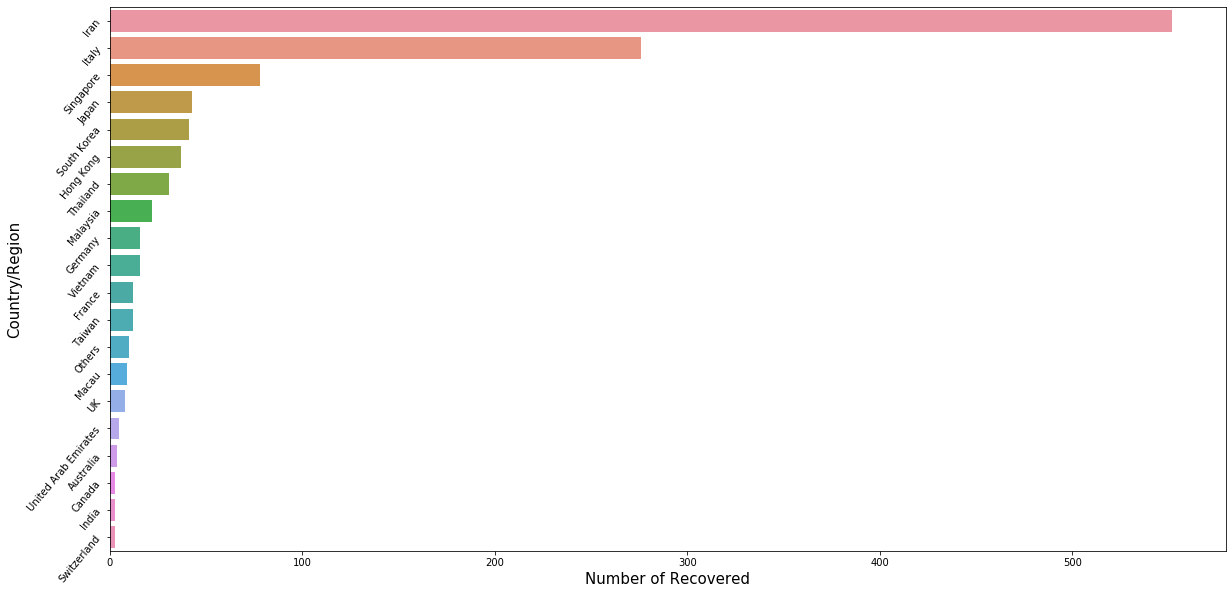

In [12]:
# analysis country exclude China
df_byCountry = df[df['Country/Region']!='Mainland China']
cf.casePlot(df_byCountry, 'Country/Region', 'Confirmed',20)
cf.casePlot(df_byCountry, 'Country/Region', 'Deaths',20)
cf.casePlot(df_byCountry, 'Country/Region', 'Recovered',20)
